# Numerical Methods for Solving ODEs
***

This notebook includes some simple numerical methods that can be used to solve ODEs numerically.

In [1]:
#import required libraries
import numpy as np
from math import sin
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 1. Euler's Method

___Given ODE___: $\frac{dx}{dt} = -x^3 + sin(t)$

The cumulative error for Euler's method is given by: $\sum^{N-1}_{k-0} \frac{1}{2} h^2 \bigg(\frac{d^2x}{dt^2}\bigg)$

In [2]:
#define the equation function 
def func(x,t):
    return(-x**3 + np.sin(t))

#An arbitrary function can be created and can be passed as argum f = <function name> to any of the functions below

In [3]:
def euler_ode(a=0.0, b=10.0, x=0.0, N=1000, f=func):
    '''
    Parameters:    a - Start of the interval
                   b - End of the interval
                   x - Intial condition
                   N - Number of steps
                   
    Returns:       (x_pts, err_pts) - (X-points, Cumulative error in X-points)
    '''
    h = (b-a)/N       #Interval size
    e = 0.0
    
    t_pts = np.arange(a, b, h)
    x_pts = []
    err_pts = []

    for t in t_pts:
        x_pts.append(x)
        x += h*f(x,t)               #Taylor expansion: x(t+h) = x(t) + h*f(x,t) + O(h**2)
    
        err_pts.append(e)
        e += (0.5*(h**2)*f(f(x, t), t))
    
    x_pts = np.array(x_pts)
    err_pts = np.array(err_pts)
    
    return(x_pts, err_pts)

In [4]:
def plot_euler(a=0.0, b=10.0, x=0.0, N=1000, f=func, plot_ODE=True, return_x=False):
    x_pts, err_pts = euler_ode(a, b, x, N, f)
    
    ################# Plot x(t) #################################
    #setting up the figure
    plt.figure(figsize=(12,8))

    #plotting
    h = (b-a)/N
    t_pts = np.arange(a, b, h)
    plt.plot(t_pts, x_pts, label="$x(t)$", color='c')
    if plot_ODE == True:
        plt.plot(t_pts, f(x_pts, t_pts), label="$dx/dt$", alpha=0.1, color='k')

    #figure properties
    plt.xlabel(r"$t$", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(linestyle='--')
    plt.title("Euler's Method", fontsize = 20, pad=12)

    plt.show()
    
    ################# Plot error in x(t) ########################
    #setting up the figure
    plt.figure(figsize=(12,8))

    plt.plot(np.arange(0,N), err_pts, color='r')

    #figure properties
    plt.xlabel("Number of Steps")
    plt.ylabel("Error")
    plt.grid(linestyle='--')
    plt.title("Cumulative Error At Each Step", fontsize = 20, pad=12)

    plt.show()
    
    if return_x == True:
        return(x_pts)

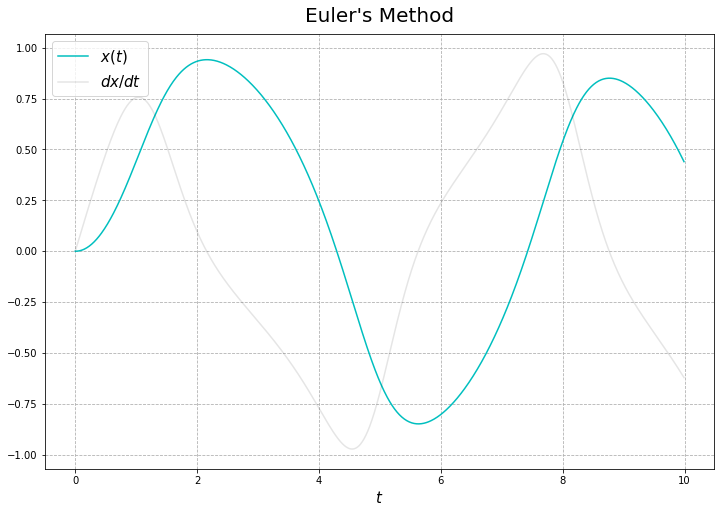

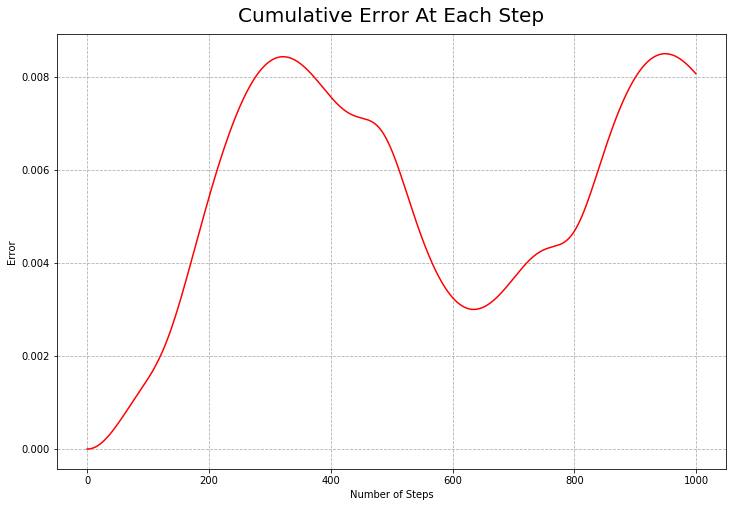

In [5]:
plot_euler()

***

## 2. 2nd Order Runge-Kutta Method

In [6]:
def RK2_ode(a=0.0, b=10.0, x=0.0, N=100, f=func):
    '''
    Parameters:    a - Start of the interval
                   b - End of the interval
                   x - Intial condition
                   N - Number of steps
    '''
    h = (b-a)/N       #Interval size
    
    t_pts = np.arange(a, b, h)
    x_pts = []
    for t in t_pts:
        x_pts.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        x += k2              
    
    x_pts = np.array(x_pts)
    
    return (x_pts)

In [7]:
def plot_RK2(a=0.0, b=10.0, x=0.0, N=100, f=func, plot_ODE=True, return_x=False):
    x_pts = RK2_ode(a, b, x, N, f)
    
    ################# Plot x(t) #################################
    #setting up the figure
    plt.figure(figsize=(12,8))

    #plotting
    h = (b-a)/N
    t_pts = np.arange(a, b, h)
    plt.plot(t_pts, x_pts, label="$x(t)$", color='c')
    
    if plot_ODE == True:
        plt.plot(t_pts, f(x_pts, t_pts), label="$dx/dt$", alpha=0.1, color='k')

    #figure properties
    plt.xlabel(r"$t$", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(linestyle='--')
    plt.title("2nd Order Runge-Kutta Method", fontsize = 20, pad=12)

    plt.show()
    
    if return_x == True:
        return(x_pts)

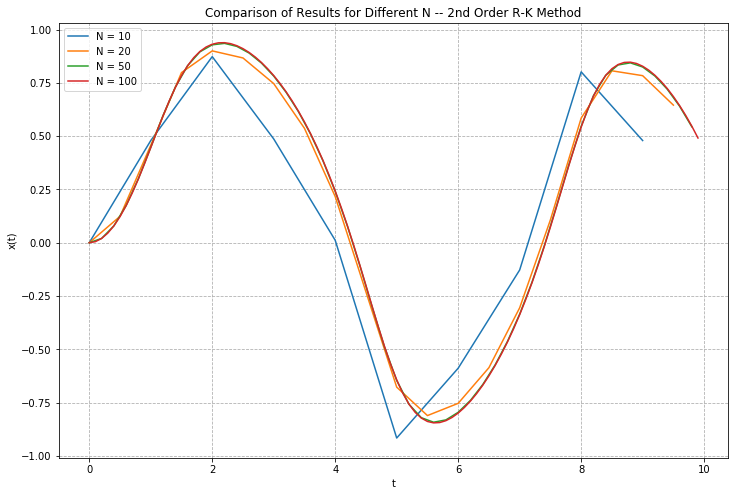

In [8]:
a, b = 0, 10

x = {}
t = {}
for i in range(10,101,10):
    x_pts = RK2_ode(N=i)
    h = (b-a)/i
    t_pts = np.arange(0, 10, h)
    x[str(i)] = x_pts
    t[str(i)] = t_pts

plt.figure(figsize=(12,8))

fig, ax = plt.gcf(), plt.gca()

for i in [10, 20, 50, 100]:
    ax.plot(t[str(i)], x[str(i)], label="N = "+str(i))
    
plt.legend()
plt.grid(linestyle='--')
plt.title("Comparison of Results for Different N -- 2nd Order R-K Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

2nd order Runge-Kutta method already requires less iterations to reach a level of accuracy shown by Euler's method in many more steps.

***

## 3. 4th Order Runge-Kutta Method

In [9]:
def RK4_ode(a=0.0, b=10.0, x=0.0, N=100, f=func):
    '''
    Parameters:    a - Start of the interval
                   b - End of the interval
                   x - Intial condition
                   N - Number of steps
    '''
    h = (b-a)/N       #Interval size
    
    t_pts = np.arange(a, b, h)
    x_pts = []
    for t in t_pts:
        x_pts.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        k3 = h*f(x+0.5*k2, t+0.5*h)
        k4 = h*f(x+k3, t+h)
        x += (k1 + 2*k2 + 2*k3 + k4)/6.0     
    
    x_pts = np.array(x_pts)
    
    return (x_pts)

In [10]:
def plot_RK4(a=0.0, b=10.0, x=0.0, N=100, f=func, plot_ODE=True, return_x=False):
    x_pts = RK4_ode(a, b, x, N, f)
    
    ################# Plot x(t) #################################
    #setting up the figure
    plt.figure(figsize=(12,8))

    #plotting
    h = (b-a)/N
    t_pts = np.arange(a, b, h)
    plt.plot(t_pts, x_pts, label="$x(t)$", color='c')
    
    if plot_ODE == True:
        plt.plot(t_pts, f(x_pts, t_pts), label="$dx/dt$", alpha=0.1, color='k')

    #figure properties
    plt.xlabel(r"$t$", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(linestyle='--')
    plt.title("4th Order Runge-Kutta Method", fontsize = 20, pad=12)

    plt.show()
    
    if return_x == True:
        return(x_pts)

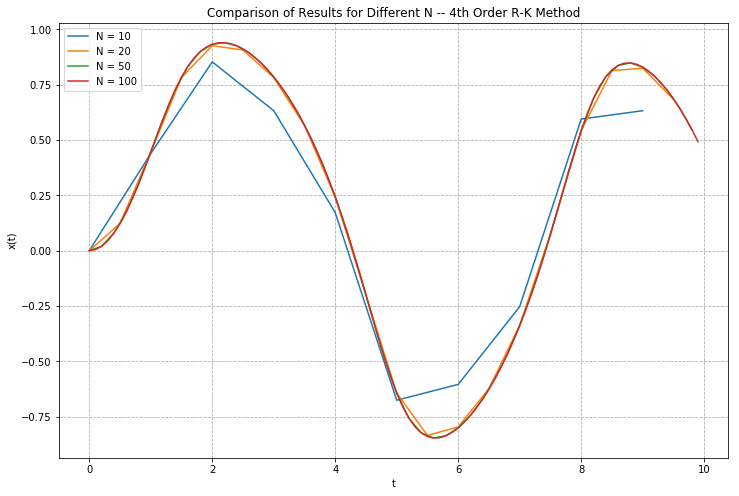

In [11]:
a, b = 0, 10

x = {}
t = {}
for i in range(10,101,10):
    x_pts = RK4_ode(N=i)
    h = (b-a)/i
    t_pts = np.arange(0, 10, h)
    x[str(i)] = x_pts
    t[str(i)] = t_pts

plt.figure(figsize=(12,8))

fig, ax = plt.gcf(), plt.gca()

for i in [10, 20, 50, 100]:
    ax.plot(t[str(i)], x[str(i)], label="N = "+str(i))
    
plt.legend()
plt.grid(linestyle='--')
plt.title("Comparison of Results for Different N -- 4th Order R-K Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

4th order Runge-Kutta method cuts the number of steps down even more, increasing the accuracy.

***

## 4. ODEs with more than one variable using RK4

In [12]:
def ode_2d(r, t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return(np.array([fx, fy], float))

In [13]:
def RK4_ode_2d(a=0.0, b=10.0, r=[0.0, 0.0], N=1000, f=ode_2d):
    '''
    Parameters:    a - Start of the interval
                   b - End of the interval
                   x - Intial condition
                   N - Number of steps
    '''
    h = (b-a)/N       #Interval size
    
    t_pts = np.arange(a, b, h)
    x_pts = []
    y_pts = []
    
    r = np.array(r)
    for t in t_pts:
        x_pts.append(r[0])
        y_pts.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6.0     
    
    x_pts = np.array(x_pts)
    y_pts = np.array(y_pts)
    
    return (x_pts, y_pts)

In [14]:
def plot_RK4_2d(a=0.0, b=10.0, r=[1.0, 1.0], N=1000, f=ode_2d, return_xy=False):
    x_pts, y_pts = RK4_ode_2d(a, b, r, N, f)
    
    ################# Plot x(t) #################################
    #setting up the figure
    plt.figure(figsize=(12,8))

    #plotting
    h = (b-a)/N
    t_pts = np.arange(a, b, h)
    plt.plot(t_pts, x_pts, label="$x(t)$", color='c')
    plt.plot(t_pts, y_pts, label="$y(t)$", color='g')
    
    #figure properties
    plt.xlabel(r"$t$", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(linestyle='--')
    plt.title("4th Order Runge-Kutta Method", fontsize = 20, pad=12)

    plt.show()
    
    plt.figure(figsize=(12,8))
    plt.plot(x_pts, y_pts)
    plt.grid(linestyle='--')
    plt.xlabel(r"$x$", fontsize=15)
    plt.ylabel(r"$y$", fontsize=15)
    
    plt.show()
    
    if return_xy == True:
        return(x_pts, y_pts)

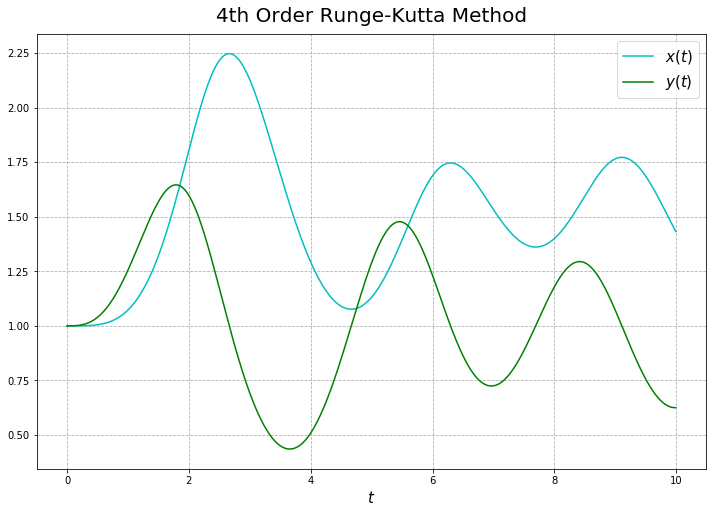

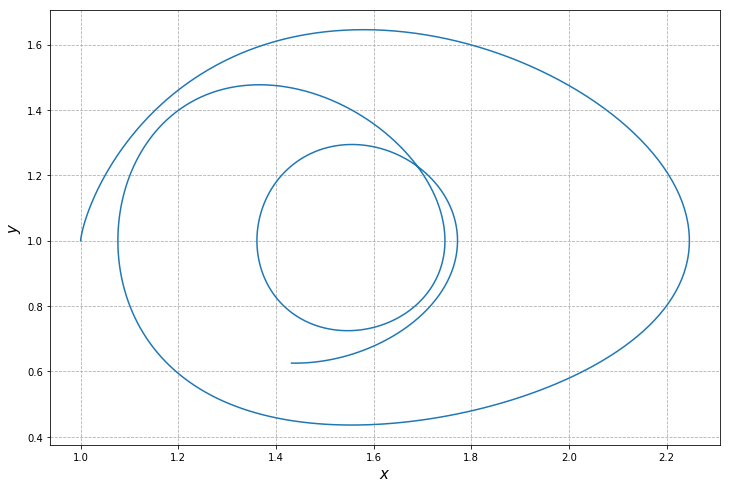

In [15]:
plot_RK4_2d()

### The Lorenz Equations

In [16]:
def ode_lorenz(R, t, sigma=10, r=28, b=8./3.):
    x = R[0]
    y = R[1]
    z = R[2]
    fx = sigma*(y-x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    return(np.array([fx, fy, fz], float))

In [17]:
def solve_lorenz(a=0.0, b=50.0, R=[0.0, 1.0, 0.0], N=1000, f=ode_lorenz):
    '''
    Parameters:    a - Start of the interval
                   b - End of the interval
                   x - Intial condition
                   N - Number of steps
    '''
    h = (b-a)/N       #Interval size
    
    t_pts = np.arange(a, b, h)
    x_pts = []
    y_pts = []
    z_pts = []
    
    R = np.array(R)
    for t in t_pts:
        x_pts.append(R[0])
        y_pts.append(R[1])
        z_pts.append(R[2])
        k1 = h*f(R,t)
        k2 = h*f(R+0.5*k1, t+0.5*h)
        k3 = h*f(R+0.5*k2, t+0.5*h)
        k4 = h*f(R+k3, t+h)
        R += (k1 + 2*k2 + 2*k3 + k4)/6.0     
    
    x_pts = np.array(x_pts)
    y_pts = np.array(y_pts)
    z_pts = np.array(z_pts)
    
    return (x_pts, y_pts, z_pts)

In [18]:
def plot_lorenz(a=0.0, b=50.0, R=[0.0, 1.0, 0.0], N=1000, f=ode_lorenz):
    x_pts, y_pts, z_pts = solve_lorenz(a, b, R, N, f)
    
    plt.figure(figsize=(12,8))
    h = (b-a)/N
    t_pts = np.arange(a, b, h)
    plt.plot(t_pts, y_pts, color='g')
    plt.xlabel(r"$t$", fontsize=15)
    plt.ylabel(r"$y(t)$", fontsize=15)
    plt.grid(linestyle='--')
    plt.title("4th Order Runge-Kutta Method", fontsize = 20, pad=12)
    plt.show()
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.plot(x_pts, y_pts, z_pts)
    ax.set_xlabel(r"$x$", fontsize=15)
    ax.set_ylabel(r"$y$", fontsize=15)
    ax.set_zlabel(r"$z$", fontsize=15)
    plt.title("The Lorenz Attractor", fontsize = 20, pad=12)
    plt.show()

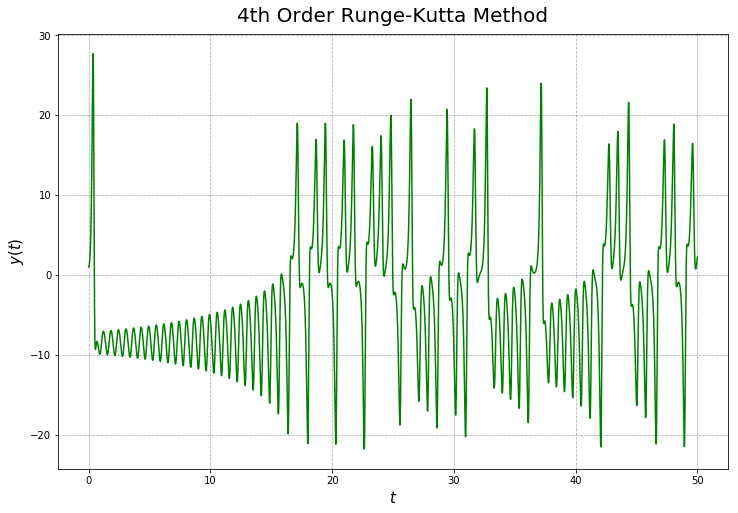

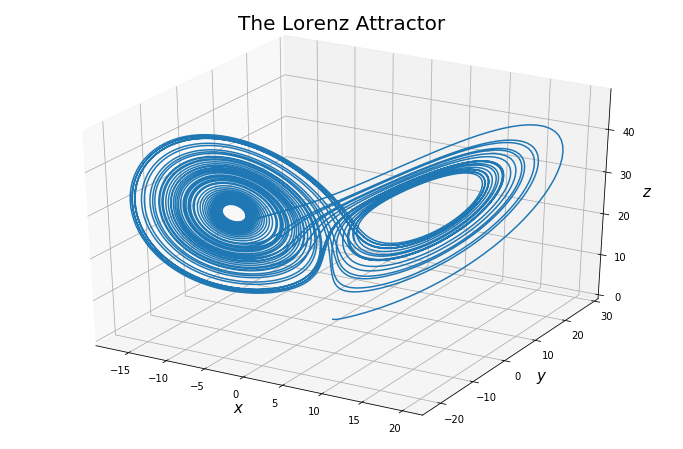

In [19]:
plot_lorenz(N=10000)

***